# Nullstellen berechnen

## Arbeitsblatt zur Einarbeitung

Dieses Arbeitsblatt muss vor dem Präsenzunterricht durchgearbeitet werden. Hier lernst du zwei Verfahren zur Berechnung von Nullstellen von Funktionen kennen. Das Ziel ist, deren Funktionsweise kennenzulernen, indem du sie selbst rudimentär implementierst. Details und Verfeinerungen besprechen wir im Präsenzunterricht.

### Bisektionsverfahren

Das einfachste Nullstellenverfahren beruht auf dem [Zwischenwertsatz](https://de.wikipedia.org/wiki/Zwischenwertsatz) der Analysis. Dieser besagt, dass eine stetige Funktion auf einem Intervall $[a,b]$ sicher alle Werte zwischen $f(a)$ und $f(b)$ annimmt. Haben $f(a)$ und $f(b)$ unterschiedliche Vorzeichen, so muss also eine Nullstelle dazwischen liegen. Dies nutzt man, um die Nullstelle durch iteratives Teilen des Intervalls einzugrenzen.

Baue ein grundlegendes Verständnis auf, indem du mindestens eines der folgenden Videos schaust:
- ["Bisektionsverfahren, fortgesetzte Bisektion, Intervallhalbierung" - MathePeter](https://www.youtube.com/watch?v=SctNmizHzXk)
- ["Bisektion, Bisektionsverfahren, Intervallhalbierung, Gleichungen lösen" - Daniel Jung](https://www.youtube.com/watch?v=poOt34st_ao)

Hier findest du eine Animation und Beschreibungen des Algorithmus: ["Das Bisektionsverfahren", Numerik I - Wikiversity](https://de.wikiversity.org/wiki/Kurs:Numerik_I/Nullstellenverfahren#Das_Bisektionsverfahren).

### Newton-Verfahren

Das Newton-Verfahren nutzt die Linearisierung der Funktion, deren Nullstelle zu berechnen ist. Ausgehend von einer Schätzung der Nullstelle liefert die Nullstelle der Linearisierung eine neue Näherung der gesuchten Nullstelle. Diese Iteration konvergiert in der Regel schnell.

Schaue mindestens eines der folgenden Videos an:
- ["Newton-Verfahren (Nullstellen bestimmen)" - Mathe-simpleclub](https://www.youtube.com/watch?v=xGemDmrCqEk)
- ["Newton Verfahren" - MathePeter](https://www.youtube.com/watch?v=JdMVcHUfAs0)
- [Playlist: "Newton-Verfahren, Gleichungen lösen, Newton-Raphson-Verfahren" - Daniel Jung](https://www.youtube.com/playlist?list=PLLTAHuUj-zHgXrIFYSt6cjADaHOg8QWjy)

Hier findest du eine Animation und Beschreibungen des Algorithmus: ["Das Newton-Verfahren", Numerik I - Wikiversity](https://de.wikiversity.org/wiki/Kurs:Numerik_I/Nullstellenverfahren#5.2.4_Das_Newton-Verfahren).

## Arbeitsauftrag

### Aufgabe 1

Wofür brauchen wir die Nullstellen einer Funktion?

- Schnittpunkte zwischen zwei Funktionen sind Nullstellen der Differenz der Beiden Funktionen.
- Höhenlinien sind Nullstellen der Differenz der Funktion und des konstanten Levels.
- Optimierung: Nullstellen der Ableitung einer Funktion können Extremstellen sein.

### Aufgabe 2

**Entscheide dich für die restlichen Aufgaben für eine der beiden Methoden: Bisektions- oder Newton-Verfahren.** (Das Bisektionsverfahren ist etwas schwieriger zu implementieren.)

Schreibe das grundsätzliche Vorgehen (Ablauf des Algorithmus) für die Berechnung von Nullstellen anhand des gewählten Verfahrens auf.

-  Bisektion:
    1. Gegeben ein Startintervall `(a[i], b[i])` mit `i = 0`
    2. Berechne die Funktion an den Grenzen. Falls `f(a[i]) * f(b[i]) > 0`, dann breche mit Fehlermeldung ab.
    3. Bestimme das Zentrum des Intervalls `x[i] = (b[i] - a[i]) / 2`
    4. Falls 
        - `f(x[i]) = 0` dann breche ab mit Erfolg.
        - `f(a[i]) * f(x[i]) < 0` dann setze `a[i + 1] = a[i]` und `b[i + 1] = x[i]`
        - sonst setze `a[i + 1] = x[i]` und `b[i + 1] = b[i]`
    5. Falls Abbruchkriterium nicht erreicht, erhöhe `i` um 1 und gehe zu Schritte 2.

-  Newton:
    1. Neben der Funktion `f(x)` brauchen wir deren analytische Ableitung `fprime(x)`
    2. Gegeben ein Startpunkt `x[i]` mit `i = 0`
    3. Berechne die Iterationsvorschrift `x[i + 1] = x[i] - f(x[i]) / fprime(x[i])`
    4. Falls Abbruchkriterium nicht erreicht, erhöhe `i` um 1 und gehe zu 3.

### Aufgabe 3

Wir betrachten die Funktion

$$ f(x) = x^3 + 3x^2 - x - 8 $$ 

Laut [Wolfram|Alpha](https://www.wolframalpha.com/input?i=x%5E3+%2B+3x%5E2+-+x+-+8+%3D+0) hat die Funktion eine reelle Nullstelle bei $x \approx 1.456678343044111087062570$ (und dann noch zwei komplexe Nullstellen, die uns hier nicht interessieren).


In [3]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return x**3 + 3 * x**2 - x - 8


x_wolfram = 1.456678343044111087062570
f(x_wolfram)


0.0

**1.** Berechne mit Python eine Wertetabelle für $f(x)$ mit den Werten $x\in\{-3, -2, -1, 0, 1, 2, 3\}$.

In [4]:
[(x, f(x)) for x in range(-3, 4)]


[(-3, -5), (-2, -2), (-1, -5), (0, -8), (1, -5), (2, 10), (3, 43)]

**2.** Wähle dann ein geeignetes Start-Intervall $[a_0,b_0]$ (Bisektion) bzw. einen geeigneten Startwert $x_0$ (Newton) aus.

- Bisektion: $[a_0, b_0] = [1, 2]$
- Newton: $x_0 = 1$

### Aufgabe 4

Berechne per Hand (d.h. Taschenrechner oder Excel) die Näherung der Nullstelle nach 4 Iterationsschritten des gewählten Verfahrens, also $[a_4,b_4]$ bzw. $x_4$. Schreibe das Resultat hier auf:

- Bisektion: $x_4 = 1.4375$
- Newton: $x_4 = 1.456678347$

### Aufgabe 5

- Stelle $f(x)$ mithilfe von Python & Matplotlib im Bereich $x\in[-3,2]$ grafisch dar.
- Plotte die oben gegebene Nullstelle `x_wolfram` dazu.
- Füge für gute Lesbarkeit auch ein Gitternetz (Grid) hinzu.

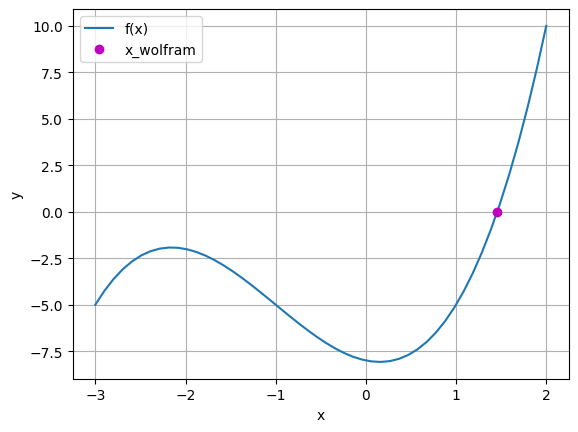

In [5]:
# Aufgabe 5
x = np.linspace(-3, 2)
y = f(x)
plt.plot(x, y, label="f(x)")
plt.plot(x_wolfram, 0, "mo", label="x_wolfram")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()


### Aufgabe 6

Schreibe eine Funktion in Python, die das gewählte Verfahren implementiert.

- *Inputs:* Start-Intervall (`a0, b0`) bzw. den $x$-Startwert (`x0`) und Anzahl Iterationsschritte (`n`)
- *Output:* $x$-Wert der Nullstelle nach der Anzahl Schritte
- *Option:* Es kann auch noch der Funktionswert an der gefundenen Stelle ausgegeben werden.

Teste deine Funktion, indem Du mit den Resultaten aus Aufgabe 4 und `x_wolfram` vergleichst.

In [6]:
# Aufgabe 6


def f(x):
    """Beispielfunktion"""
    return x**3 + 3 * x**2 - x - 8


def fprime(x):
    """Ableitung der Beispielfunktion, per Hand vorher berechnet"""
    return 3 * x**2 + 6 * x - 1


In [7]:
def bisection(f, a0, b0, n):
    assert a0 < b0 and n >= 0
    a, b = a0, b0
    for _ in range(n):
        ya, yb = f(a), f(b)
        assert ya * yb <= 0
        x = (a + b) / 2
        y = f(x)
        if y == 0:
            return x
        elif ya * y < 0:
            b = x
        else:
            a = x
    return x


print("bisection: x_4 =", bisection(f, 1, 2, 4))


bisection: x_4 = 1.4375


In [8]:
def newton(f, fprime, x0, n):
    assert n >= 0
    x = x0
    for _ in range(n):
        x = x - f(x) / fprime(x)
    return x


print("newton: x_4 =", newton(f, fprime, 1, 4))


newton: x_4 = 1.4566783471563658


### Aufgabe 7 (optional)

Ändere die Funktion aus Aufgabe 6 so ab, dass sie statt die Anzahl Iterationen eine Toleranz als Input entgegen nimmt. Diese soll als Abbruchkriterium verwendet werden.

- *Inputs:* Start-Intervall (`a0, b0`) bzw. den $x$-Startwert (`x0`) und die Toleranz (`tol`)
- *Output:* Liste der $x$-Werte und eine Liste der $y$-Werte aller Schritte. (Beim Bisektionsverfahren jeweils das Zentrum des Intervalls als $x$-Wert ausgeben.)
- *Hinweis:* Das Abbruchkriterium hängt von der Toleranz ab:
  - Bisektionsverfahren: Abbruch sobald der Betrag des Funktionswerts im Zentrum des Intervalls kleiner als die Toleranz ist.
  - Newton-Verfahren: Abbruch sobald der Betrag des Funktionswerts beim aktuellen $x$-Wert kleiner als die Toleranz ist.

Berechne die iterative Näherung mit Toleranz $10^{-8}$ (`tol=1e-8`) und stelle die Punkte im Diagramm von Aufgabe 5 als rote Punkte dar.

In [9]:
# Aufgabe 7
def bisection2(f, a0, b0, tol):
    assert a0 < b0 and tol > 0
    a, b = a0, b0
    x = (a + b) / 2
    y = f(x)
    xs = [x]
    ys = [y]
    while abs(y) >= tol:
        if f(a) * y < 0:
            b = x
        else:
            a = x
        x = (a + b) / 2
        y = f(x)
        xs.append(x)
        ys.append(y)
    return (xs, ys)


print("bisection:", bisection2(f, 1, 2, 1e-8))


bisection: ([1.5, 1.25, 1.375, 1.4375, 1.46875, 1.453125, 1.4609375, 1.45703125, 1.455078125, 1.4560546875, 1.45654296875, 1.456787109375, 1.4566650390625, 1.45672607421875, 1.456695556640625, 1.4566802978515625, 1.4566726684570312, 1.4566764831542969, 1.4566783905029297, 1.4566774368286133, 1.4566779136657715, 1.4566781520843506, 1.4566782712936401, 1.456678330898285, 1.4566783607006073, 1.456678345799446, 1.4566783383488655, 1.4566783420741558, 1.456678343936801, 1.4566783430054784], [0.625, -2.609375, -1.103515625, -0.267822265625, 0.171356201171875, -0.050029754638671875, 0.06021261215209961, 0.004978954792022705, -0.022553496062755585, -0.008794297464191914, -0.0019094283925369382, 0.0015343238919740543, -0.00018766207176668104, 0.0006733034540502558, 0.00024281382721369482, 2.757416175214189e-05, -8.004438399922265e-05, -2.6235218371084557e-05, 6.694448781985329e-07, -1.2782893449525545e-05, -6.056725961656184e-06, -2.6936409600608613e-06, -1.0120981457362177e-06, -1.713266595260

In [12]:
def newton2(f, fprime, x0, tol):
    assert tol > 0
    x = x0
    y = f(x)
    xs = [x]
    ys = [y]
    while abs(y) >= tol:
        x = x - y / fprime(x)
        y = f(x)
        xs.append(x)
        ys.append(y)
    return (xs, ys)


print("newton:", newton2(f, fprime, 1, 1e-8))


newton: ([1, 1.625, 1.4697750702905341, 1.4567670625432623, 1.4566783471563658, 1.456678343044111], [-5, 2.587890625, 0.1860062727299443, 0.0012515180054233355, 5.800666436073243e-08, 0.0])


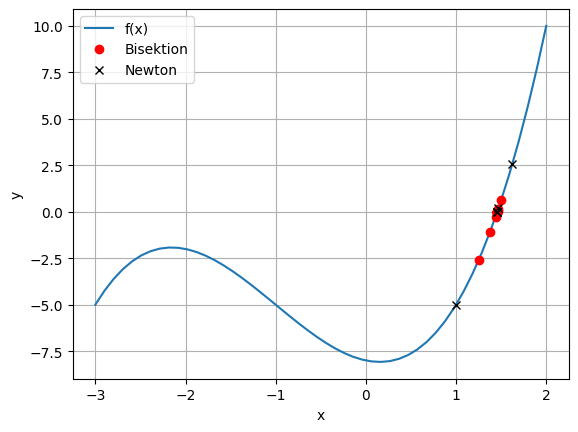

In [13]:
tol = 1e-8
x = np.linspace(-3, 2)
y = f(x)
x_b, y_b = bisection2(f, 1, 2, tol)
x_n, y_n = newton2(f, fprime, 1, tol)

plt.plot(x, y, label="f(x)")
plt.plot(x_b, y_b, "ro", label="Bisektion")
plt.plot(x_n, y_n, "kx", label="Newton")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()


Alternativ kann man auch den Verlauf der Iteration darstellen.

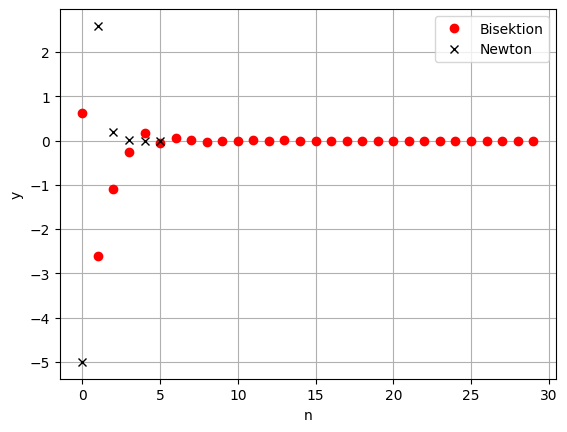

In [18]:
plt.plot(y_b, "ro", label="Bisektion")
plt.plot(y_n, "kx", label="Newton")
plt.xlabel("n")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

